## A3

In [115]:
import pymc as pm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("heart.csv")
print(data.columns, data.shape)

theta_0,sigma = 0,1; alpha,beta = 2,0.5
x = data.sample(n=800)['trestbps']
# for e in x:
#   if type(e) != int:
#     print(e)
# ax = plt.subplots(1,1,figsize=(12,6))
# ax[1].hist(x)

normal_gamma = pm.Model()
with normal_gamma:
    theta = pm.Normal("theta", mu=theta_0, sigma=1)
    phi = pm.Gamma("phi", alpha=alpha, beta=beta)
    x_obs = pm.Normal("likelihood", mu=theta, tau=phi, observed=x)
    HMC = pm.sample()


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object') (1025, 14)


HMC Split-Rhats {'theta': 1.001, 'phi': 1.0024}


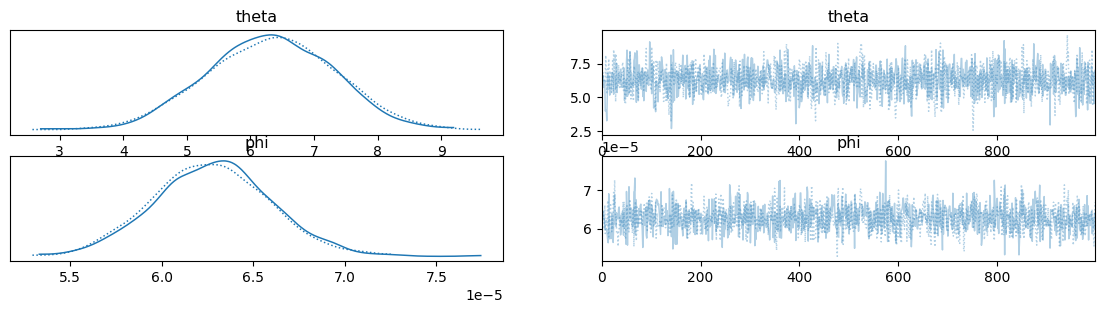

In [116]:
import arviz as az; import matplotlib.pyplot as plt; fig,ax = plt.subplots(2,2, figsize=(14,3))
az.plot_trace(HMC, axes=ax[:2,:2])
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC).items()});

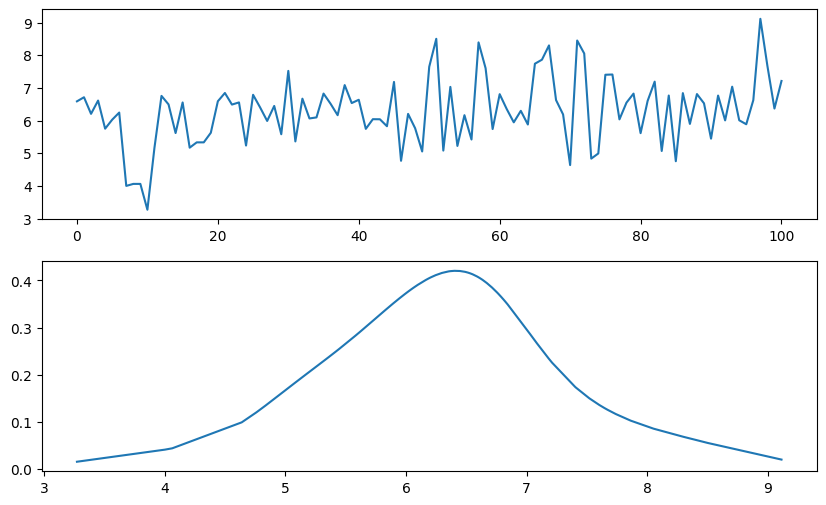

In [117]:
from scipy.stats import gaussian_kde
fig,ax = plt.subplots(2,1, figsize=(10,6))
n = 100

chain = HMC.posterior["theta"].sel(chain=0, draw=slice(0, n)).values;
chain_sorted = sorted(chain)
ax[0].plot(chain);
ax[1].plot(chain_sorted,gaussian_kde(chain_sorted)(chain_sorted));



Autocorrelation for HMC (MCMC) chain 0.07173718631850012


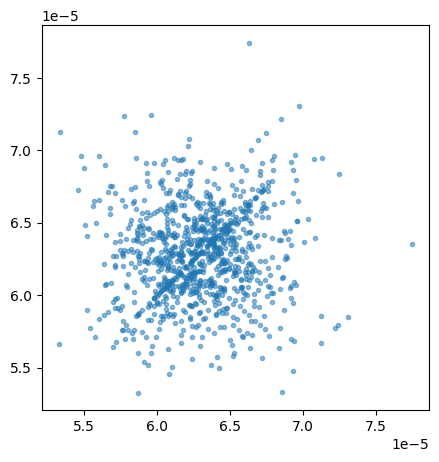

In [118]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
max_mcmc_samples = 1000
mcmc_chain = HMC.posterior["phi"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values;
mcmc_chain_one_step_ahead = HMC.posterior["phi"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values;
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)

print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [119]:
az.summary(HMC, round_to = 5) # Can't figure out why phi acts this way, it seems to stay extremely low regardless of changes in code.

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,6.30521,1.00442,4.56461,8.24302,0.02478,0.01752,1645.19224,1227.10296,1.00097
phi,0.00006,0.00000,0.00006,0.00007,0.00000,0.00000,1640.22555,1501.23146,1.00243


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

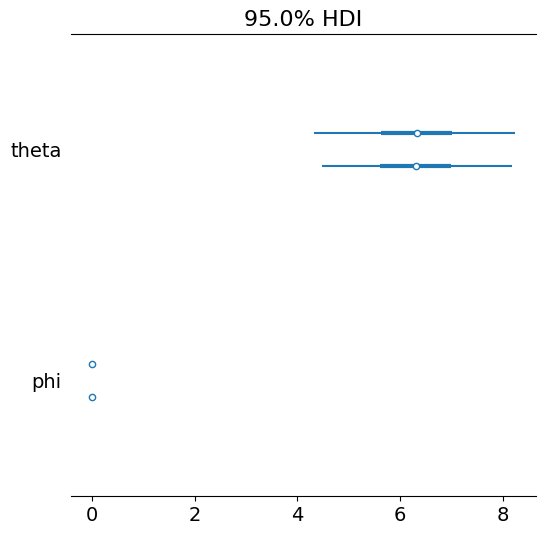

In [120]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
az.plot_forest(HMC, var_names=["theta","phi"], combined=False, hdi_prob=0.95, ax=ax)

In [125]:
x2 = data.sample(n=100)['sex']
non_normal = pm.Model()
with non_normal:
    n=100
    prob = pm.Beta("prob", alpha=1, beta=1)
    obs = pm.Binomial("Likelihood", n=n, p=prob, observed = x2)
    HMC2 = pm.sample()

HMC Split-Rhats {'prob': 1.0014}


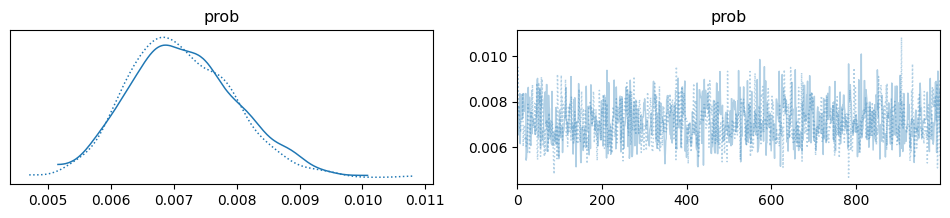

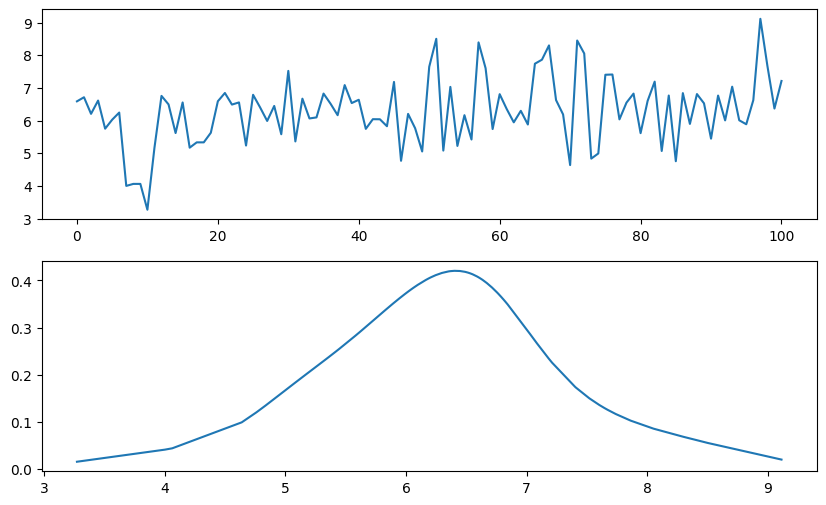

In [145]:
az.plot_trace(HMC2)
print("HMC Split-Rhats", {k: np.round(v.values,4) for k,v in az.rhat(HMC2).items()})


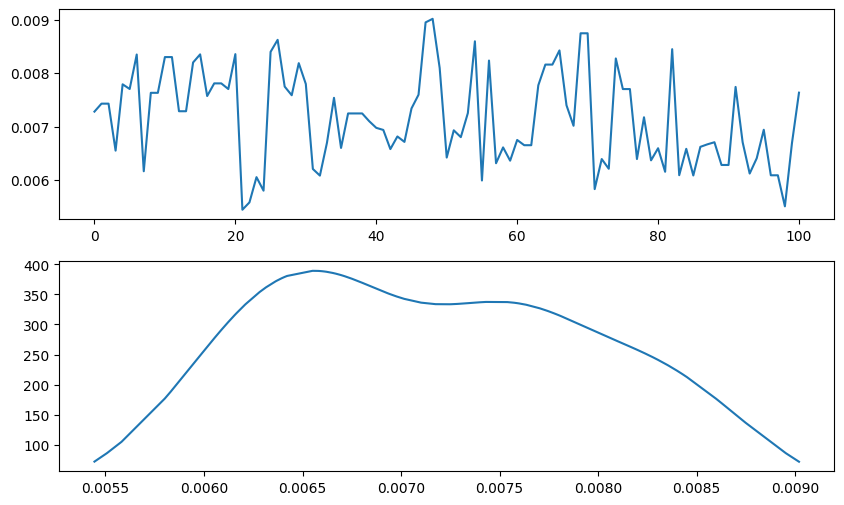

In [148]:
fig,ax = plt.subplots(2,1, figsize=(10,6))
n = 100

chain = HMC2.posterior["prob"].sel(chain=0, draw=slice(0, n)).values
chain_sorted = sorted(chain)
ax[0].plot(chain)
ax[1].plot(chain_sorted,gaussian_kde(chain_sorted)(chain_sorted))

Autocorrelation for HMC (MCMC) chain 0.3303466771040912


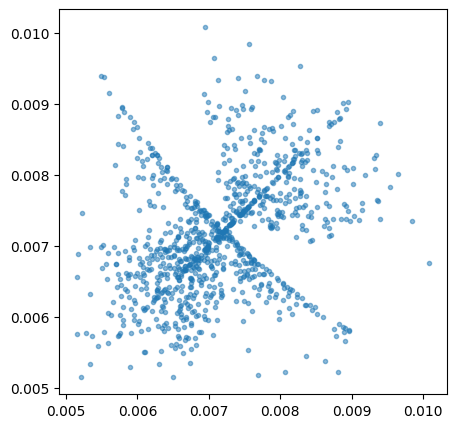

In [149]:
fig,ax = plt.subplots(1,1, figsize=(5,5))
max_mcmc_samples = 1000
mcmc_chain = HMC2.posterior["prob"].sel(chain=0, draw=slice(0, max_mcmc_samples-2)).values;
mcmc_chain_one_step_ahead = HMC2.posterior["prob"].sel(chain=0, draw=slice(1, max_mcmc_samples-1)).values;
ax.plot(mcmc_chain, mcmc_chain_one_step_ahead, '.', alpha=0.5)

print("Autocorrelation for HMC (MCMC) chain", np.corrcoef(mcmc_chain,mcmc_chain_one_step_ahead)[0,1])

In [151]:
az.summary(HMC2, round_to = 5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
prob,0.00713,0.00084,0.0057,0.00882,0.00003,0.00002,972.82327,1476.81497,1.00141


array([<Axes: title={'center': '95.0% HDI'}>], dtype=object)

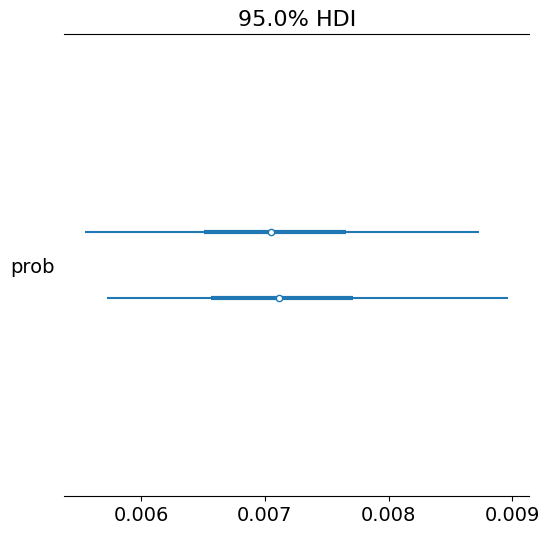

In [152]:
fig,ax = plt.subplots(1,1, figsize=(6,6))
az.plot_forest(HMC2, var_names=["prob"], combined=False, hdi_prob=0.95, ax=ax)